In [1]:
# Pandas Web User Guide Follow along

# Visualization
#    https://pandas.pydata.org/docs/user_guide/visualization.html

# Created 12/01/20

In [66]:
# Notes & hints on Matplotlib & related visualization
# Created by: Tony Held, tony.held@gmail.com
# Created on: 12/01/2020

# **********************************************
#    Standard Imports 
# **********************************************

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# **********************************************
#    Matplotlib related settings 
#
#    (also applies to figures created in pandas)
# **********************************************

# Jupyter specific settings start with %

# %matplotlib 'option' determines if figures are inline or will update dynamically

# Not dynamic, but may be the most robust
# %matplotlib inline
# Dynamic and can update figures
%matplotlib notebook
# May only work in jupyter labs (not notebook)
# %matplotlib widget     

# Default matplotlib figure size
plt.rcParams["figure.figsize"] = (5,3)     # Set default fig size

# Setting figure size parameter for a single plot made from a pandas dataframe
# df.plot(figsize=(4,3))

# **********************************************
#    Matplotlib Figure Paradigms
#
#    Details at: https://matplotlib.org/3.3.3/tutorials/introductory/usage.html
# **********************************************

# There are two paradimes for using Matplotlib to create/manipulate matplotlib figures:

#    1.  Explicitly create figures and axes, 
#           and call methods on them from an axes (the "object-oriented (OO) style").
#    2.  Rely on pyplot to automatically create and manage the figures and axes, 
#           and use pyplot functions for plotting.

# In OO style you create the figures and axis ahead of time 
# and then call plot on the axis you created

# fig, ax = plt.subplots()  # Create a figure and an axes.
# ax.plot(x,y)              # call plot from the axes you created
# ax.set_xlabel('x label')  # Add an label to the x axes.


# In automatic mode, you call plot and the figures/axes will be created dynamically
# It requires less code than OO mode initially, but if you want to modify the figure
# it may require additional code to determine the proper references to the figure/axes

# plt.plot(x,y)              # create plot - matplotlib guesses which figure/axes to put it on
# plt.xlabel('x label')      # Add an label to the x axes
                             # Notice you don't use 'set_' when labeling from plt
                             # Whereas you did when plotting in OO mode
        
# The form of the plot documentation for each mode is:
# matplotlib.pyplot.function     # Automatic Mode
# matplotlib.axes.Axes.function  # OO Mode


# Some automatic mode statements that may be useful
# plt.get_fignums()       # Get list of active figures
# plt.figure(x);          # Activate the figure if it exists, create it if it does not
                          # Semi colon is recomended so  you don't have multiple visualizations of the same fig
# plt.close('all')        # Close all open figures
# plt.gcf()               # Get the current figure.
                          # If no current figure exists, a new one is created using figure()
# plt.gca()               # Get the current axes, creating one if necessary.

# Additional useful function calls
# ax_list = fig.axes      <-- Returns a list of the Axes objects in the Figure object:


# **********************************************
#    Panda Figure Paradigms
# **********************************************

# If you plot directly from a panda object (e.g. a DataFrame)
# your plot will be created in the automatic mode listed above

# If you want your plot to be placed on an axes created in OO mode
# you can specify the axis in the plot statement as follows

# fig, ax = plt.subplots()
# df.plot(..., axis=ax)


# **********************************************
#    Jupyter Interactive Mode Settings
#
#    These control what is printed in the out: cell
# **********************************************

# How interactive you want is discussed:
# https://ipython.readthedocs.io/en/stable/config/options/terminal.html
# Options are: 'all', 'last', 'last_expr', 'none', 'last_expr_or_assign'
# Default is: 'last_expr'

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity I can only get last_expr_or_assign to work
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

In [3]:
def diag(*args):
    """Pandas diagnostics"""
    
    for i in args:
        
        if isinstance(i, pd.core.frame.DataFrame):
            print(i.info())
            display(i)
        else:
            print(f'{"-"*40}')
            print(f'Type: {type(i)}')

            try:
                print(f'Length: {len(i)}')
            except:
                pass

            try:
                print(i.info())
            except:
                pass

            try:
                display(i)
            except:
                print(i)
                
z = diag
d = display;

In [5]:
def read_df(text):
    """Create a pandas dataframe from a string of a dataframe
    copied from the pandas website tutorial."""
    lines = text.split('\n')
    cols = lines[0].split()
    index, array = [], []
    for line in lines[1:]:
        vals = line.split()
        index.append(vals[0])
        array.append(vals[1:])
#     print(cols)
#     print(index)
#     print(array)
    df = pd.DataFrame(array, index=index, columns=cols)
    return df

In [9]:
# set random seed used in many of the pandas online documentation examples
np.random.seed(seed=123456)

In [11]:
np.random.seed(seed=123456)
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000));

In [12]:
ts = ts.cumsum();
ts2 = ts*2;
ts3 = ts*3;
ts4 = ts/2;

<IPython.core.display.Javascript object>


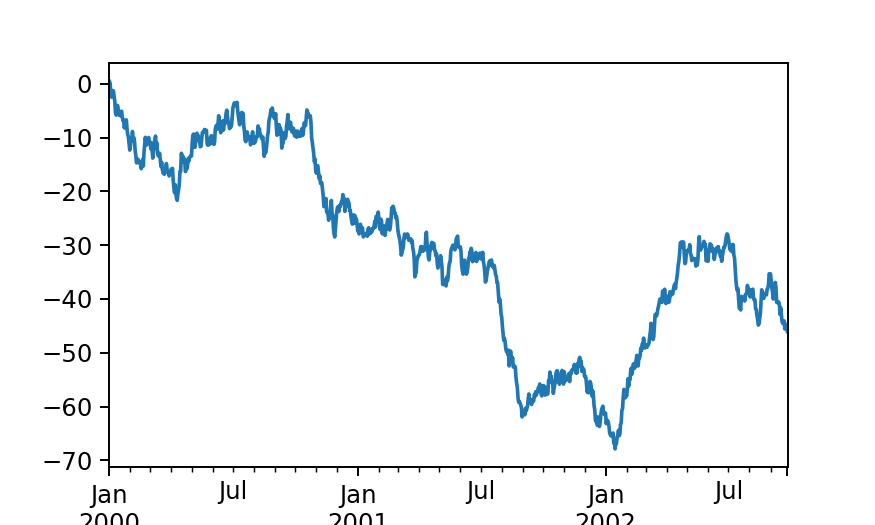

<AxesSubplot:>

In [13]:
ts.plot()

In [15]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))
df = df.cumsum();

,A,B,C,D
2000-01-01,0.469112,-0.282863,-1.509059,-1.135632
2000-01-02,1.212112,-0.173215,0.119209,-1.044236
2000-01-03,-0.861849,-2.104569,-0.494929,1.071804
2000-01-04,0.721555,-0.706771,-1.039575,0.271860
2000-01-05,-0.424972,0.567020,0.276232,-1.087401
...,...,...,...,...
2002-09-22,0.979256,-1.180839,-0.544735,-0.714758
2002-09-23,-0.701966,-1.233189,1.316605,0.313410
2002-09-24,-0.591876,1.226774,0.227639,1.709756
2002-09-25,-0.061853,1.093207,-0.179307,-1.672583


<IPython.core.display.Javascript object>


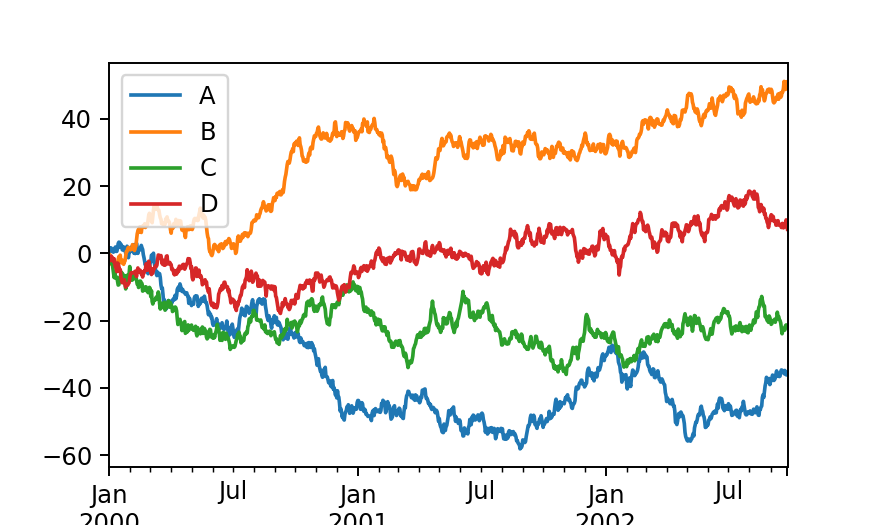

In [17]:
df.plot();

<IPython.core.display.Javascript object>


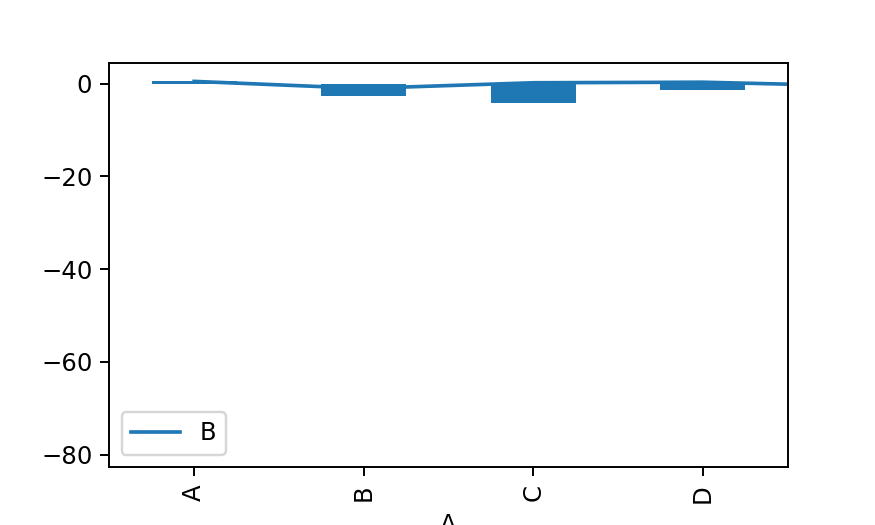

<AxesSubplot:xlabel='A'>

In [19]:
np.random.seed(seed=123456)
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

In [20]:
z(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2000-01-01 to 2002-09-26
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
 3   D       1000 non-null   float64
dtypes: float64(4)
memory usage: 39.1 KB
None


,A,B,C,D
2000-01-01,0.469112,-0.282863,-1.509059,-1.135632
2000-01-02,1.681224,-0.456078,-1.389850,-2.179868
2000-01-03,0.819375,-2.560647,-1.884779,-1.108065
2000-01-04,1.540931,-3.267418,-2.924354,-0.836205
2000-01-05,1.115958,-2.700398,-2.648122,-1.923605
...,...,...,...,...
2002-09-22,-34.814152,49.997329,-22.826052,7.940453
2002-09-23,-35.516118,48.764139,-21.509447,8.253863
2002-09-24,-36.107993,49.990913,-21.281808,9.963618
2002-09-25,-36.169846,51.084120,-21.461116,8.291035


<IPython.core.display.Javascript object>


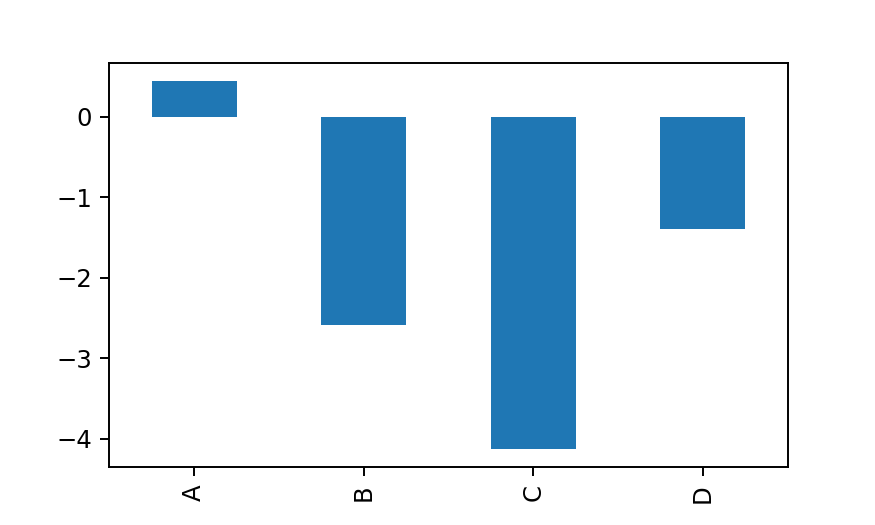

In [22]:
plt.figure();
df.iloc[5].plot(kind='bar');

<IPython.core.display.Javascript object>


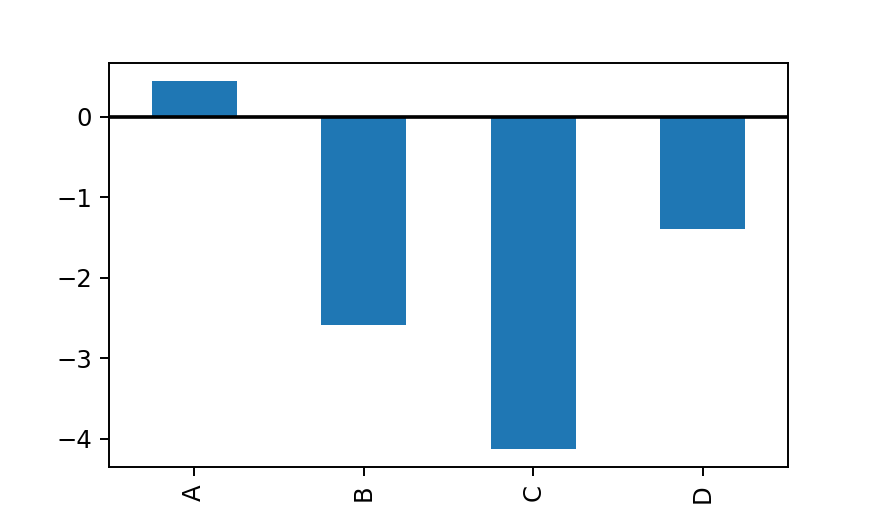

In [23]:
plt.figure();

In [24]:
df.iloc[5].plot.bar()

<AxesSubplot:>

In [25]:
 plt.axhline(0, color='k');

<IPython.core.display.Javascript object>


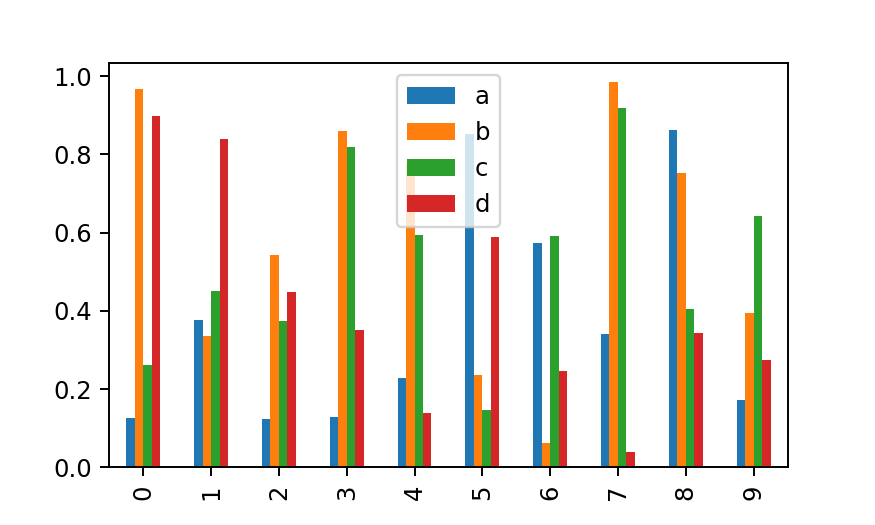

In [26]:
np.random.seed(seed=123456)
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar();

<IPython.core.display.Javascript object>


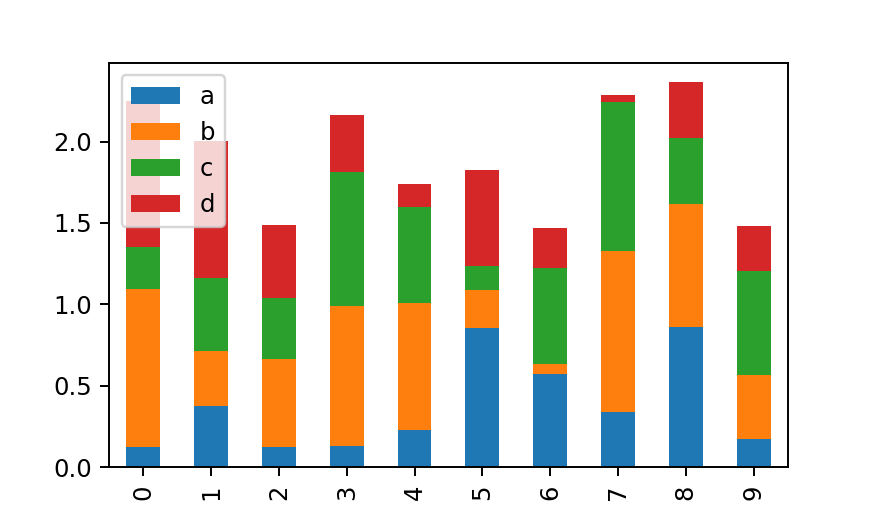

In [27]:
df2.plot.bar(stacked=True);

<IPython.core.display.Javascript object>


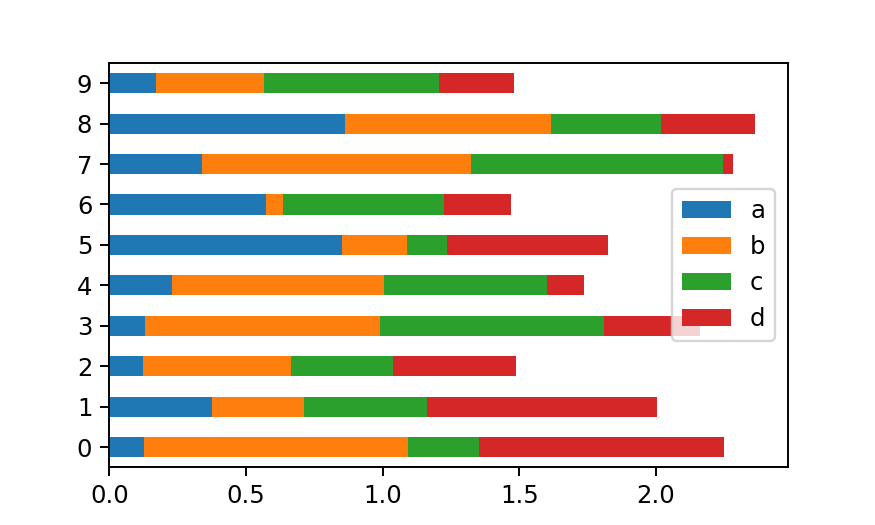

In [28]:
df2.plot.barh(stacked=True);

<IPython.core.display.Javascript object>


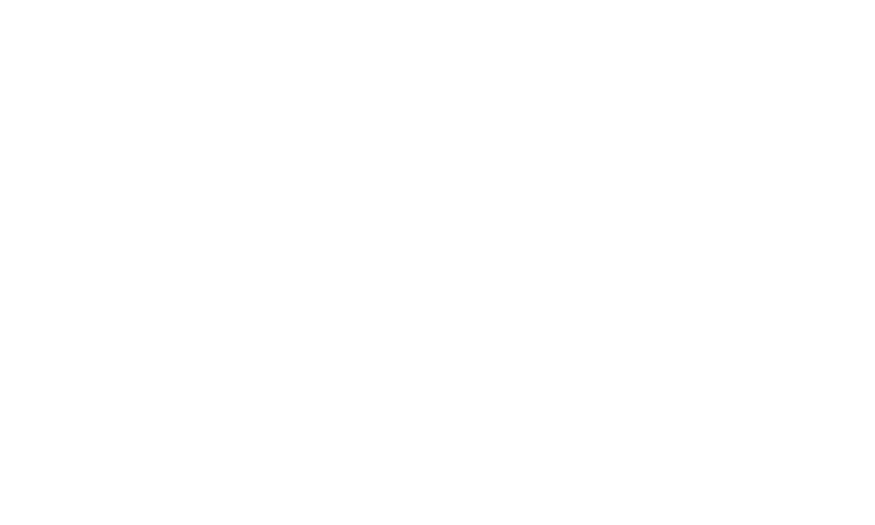

<IPython.core.display.Javascript object>


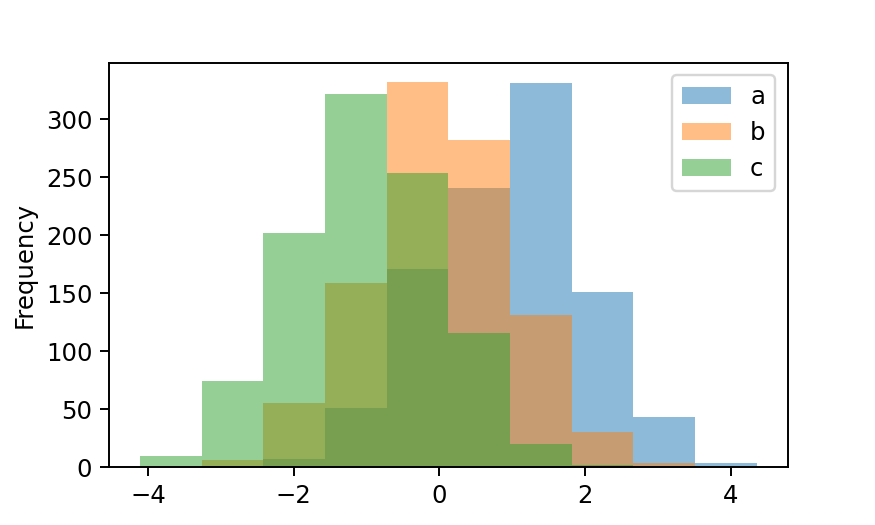

<AxesSubplot:ylabel='Frequency'>

In [29]:
np.random.seed(seed=123456)
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure();
df4.plot.hist(alpha=0.5)

<IPython.core.display.Javascript object>


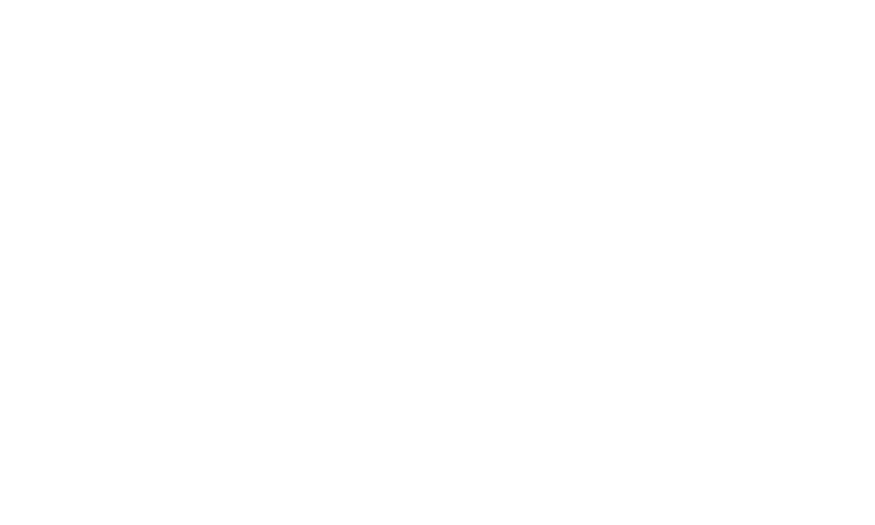

<IPython.core.display.Javascript object>


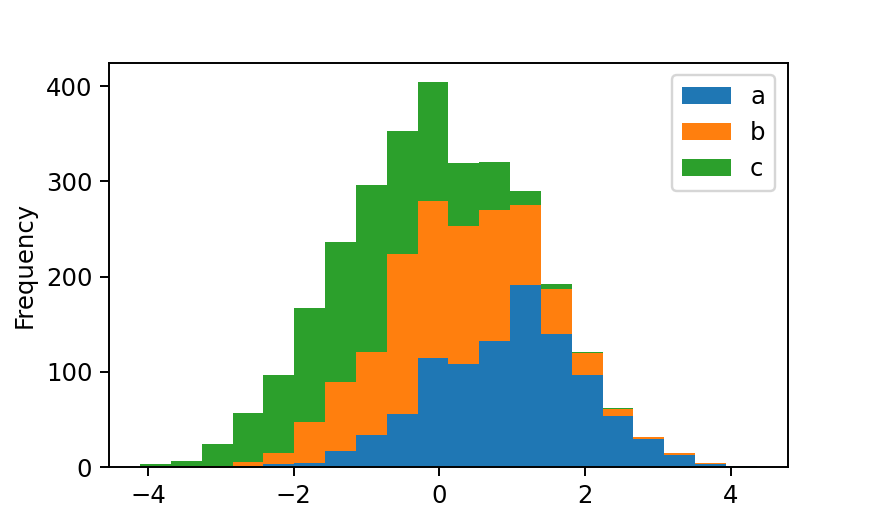

<AxesSubplot:ylabel='Frequency'>

In [30]:
plt.figure();
df4.plot.hist(stacked=True, bins=20)

<IPython.core.display.Javascript object>


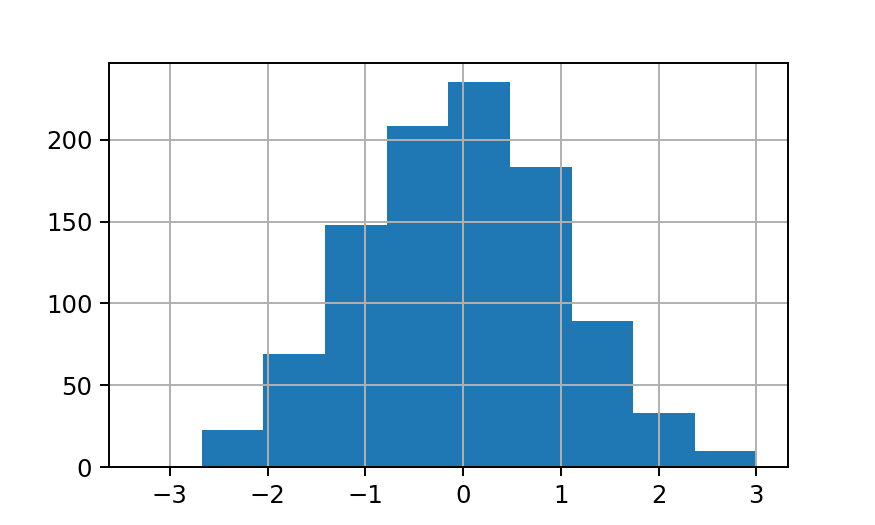

<AxesSubplot:>

In [31]:
plt.figure();
df['A'].diff().hist()

<IPython.core.display.Javascript object>


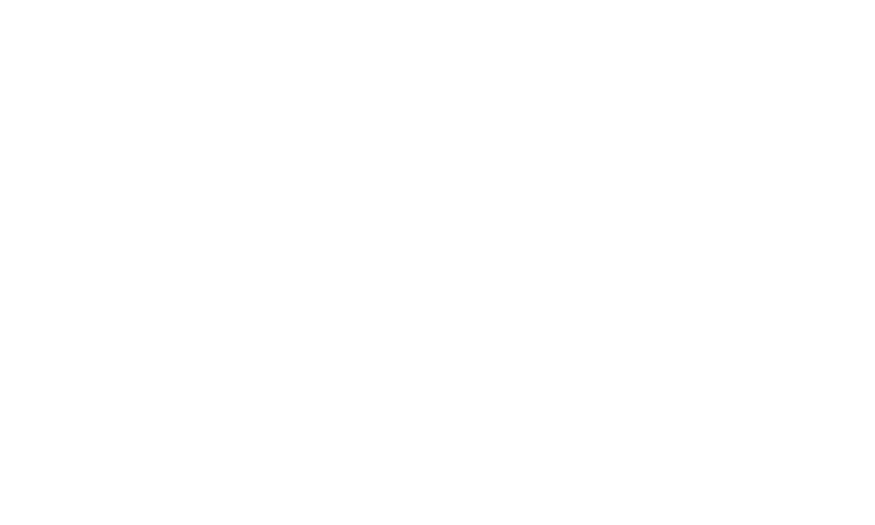

<IPython.core.display.Javascript object>


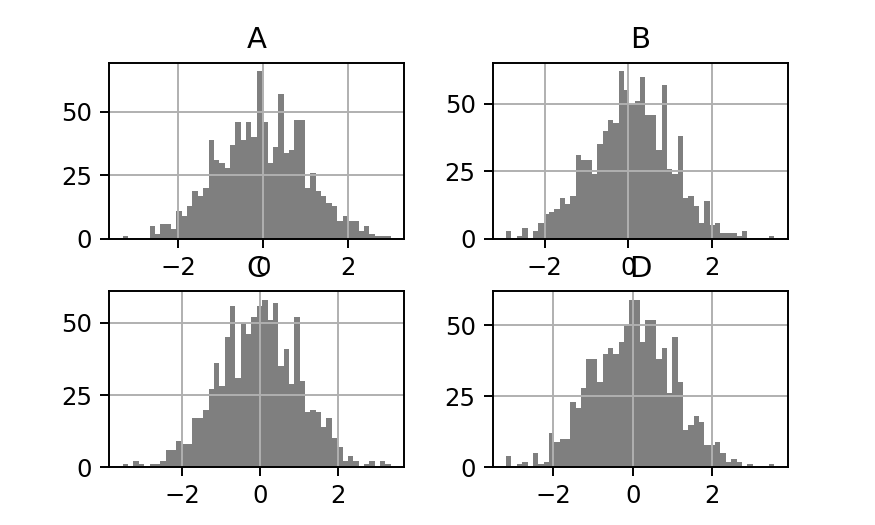

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>]], dtype=object)

In [33]:
plt.figure()
df.diff().hist(color='k', alpha=0.5, bins=50)

In [34]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

,A,B,C,D,E
0,0.083287,0.989943,0.050765,0.859300,0.470541
1,0.335421,0.827397,0.039727,0.222120,0.574320
2,0.283561,0.045105,0.155968,0.975435,0.741147
3,0.015966,0.365385,0.073073,0.115832,0.857572
4,0.002050,0.717203,0.115723,0.082211,0.485350
5,0.490753,0.319992,0.451827,0.655664,0.424485
6,0.563701,0.437596,0.845235,0.757175,0.069507
7,0.180778,0.809800,0.372046,0.612722,0.495609
8,0.528919,0.415013,0.765667,0.225747,0.825186
9,0.062536,0.526179,0.625333,0.210145,0.154883


<IPython.core.display.Javascript object>


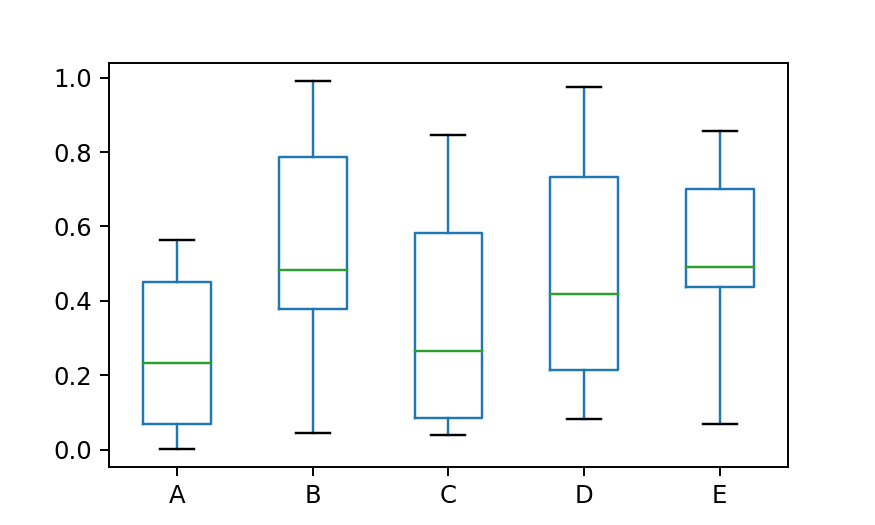

<AxesSubplot:>

In [36]:
df.plot.box()

<IPython.core.display.Javascript object>


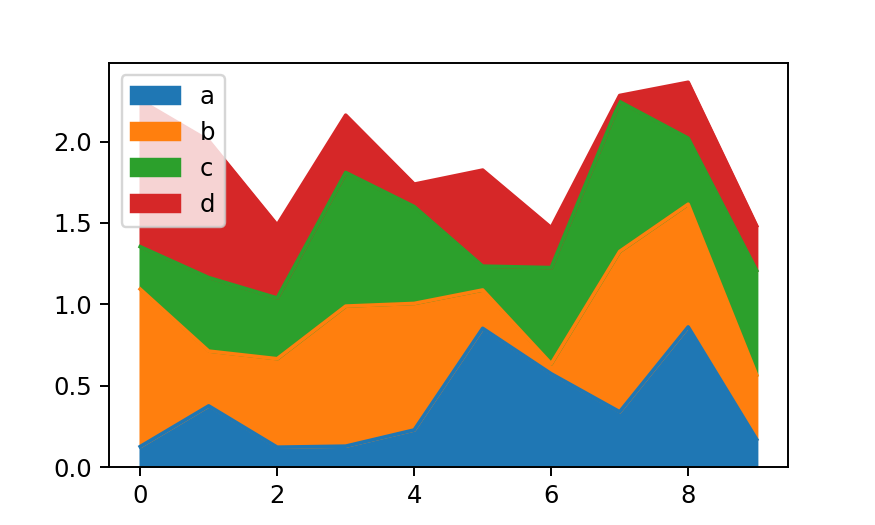

In [37]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area();

<IPython.core.display.Javascript object>


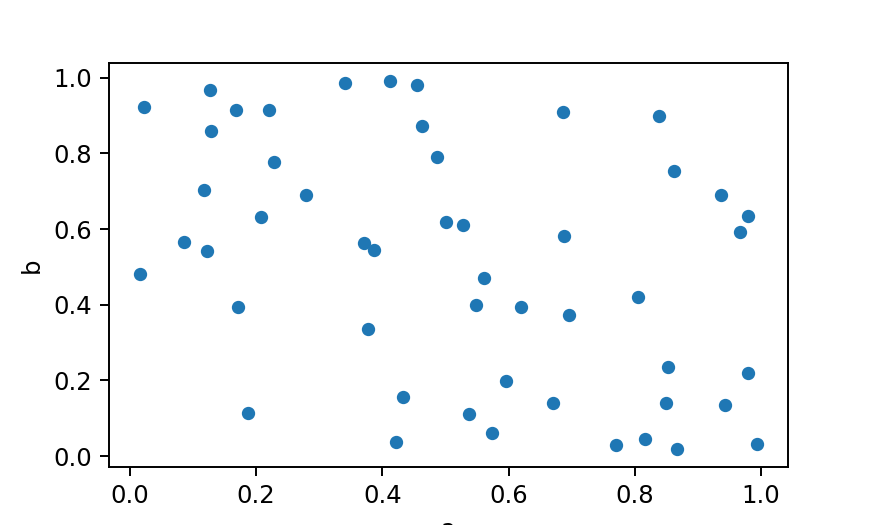

In [39]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

<IPython.core.display.Javascript object>


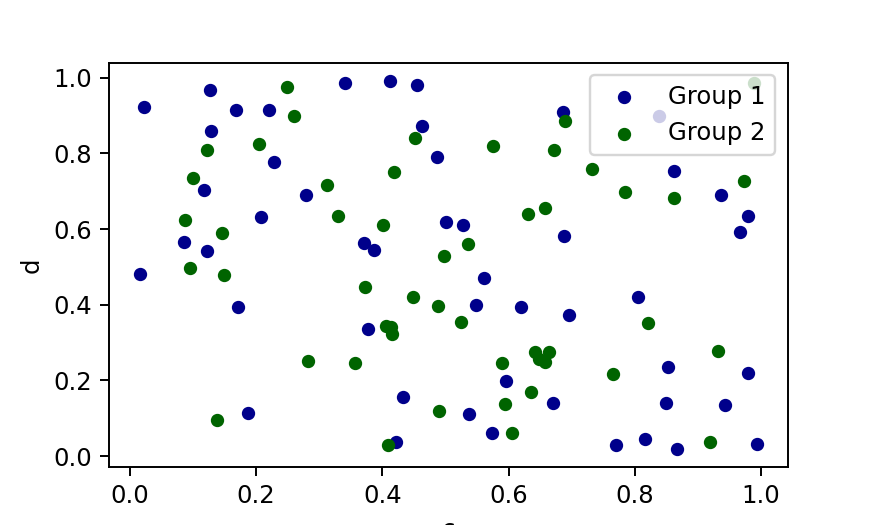

In [40]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

c:\users\tony\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>


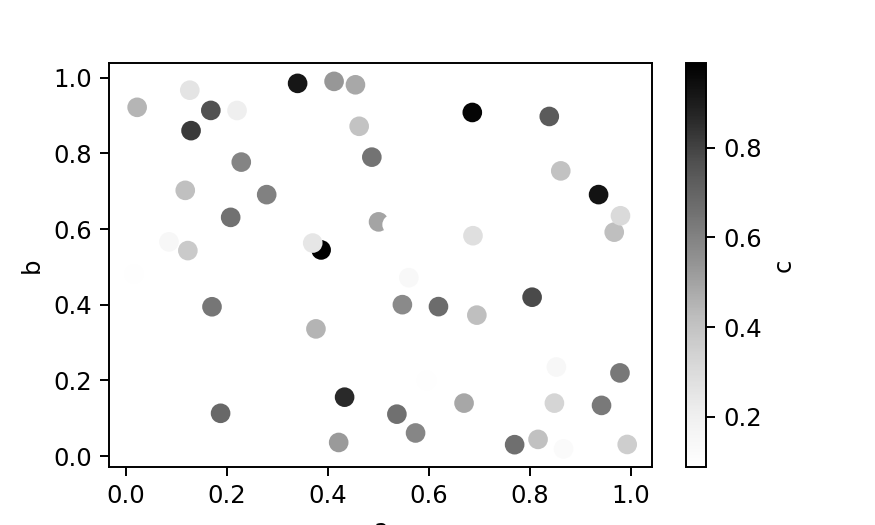

In [41]:
df.plot.scatter(x='a', y='b', c='c', s=50);

<IPython.core.display.Javascript object>


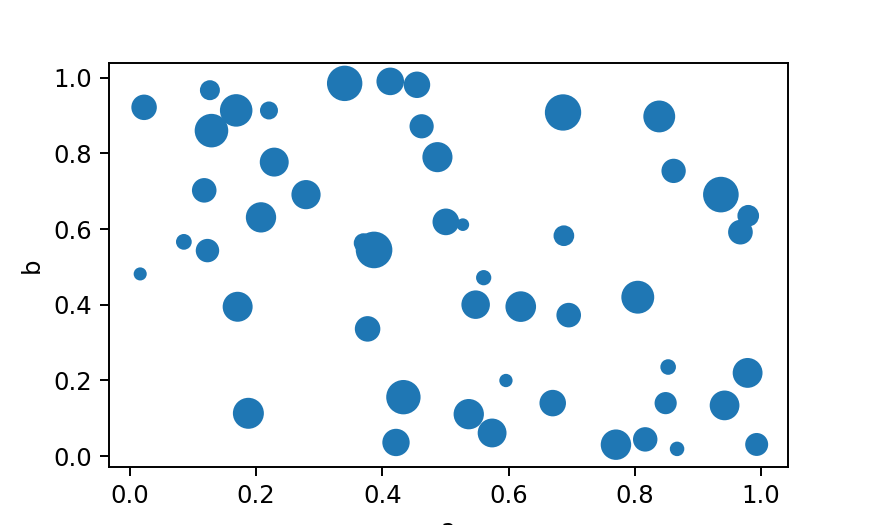

In [42]:
df.plot.scatter(x='a', y='b', s=df['c'] * 200);

<IPython.core.display.Javascript object>


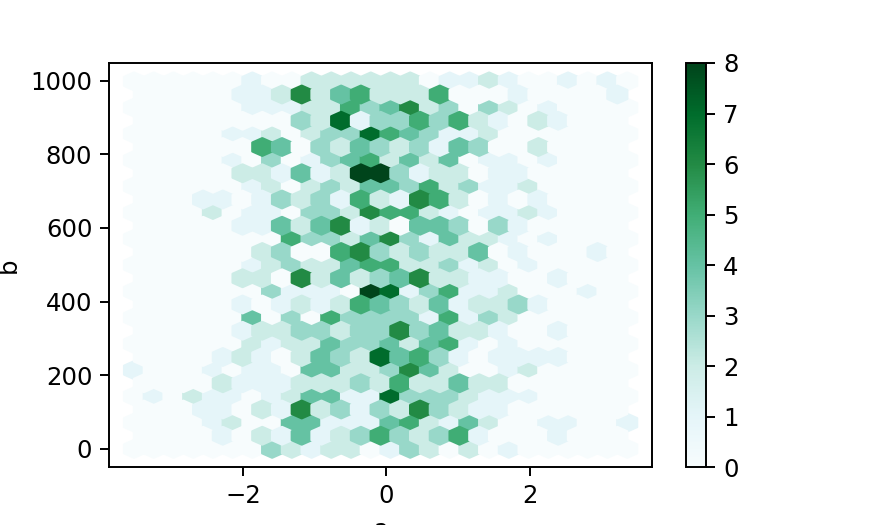

<AxesSubplot:xlabel='a', ylabel='b'>

In [43]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x='a', y='b', gridsize=25)

<IPython.core.display.Javascript object>


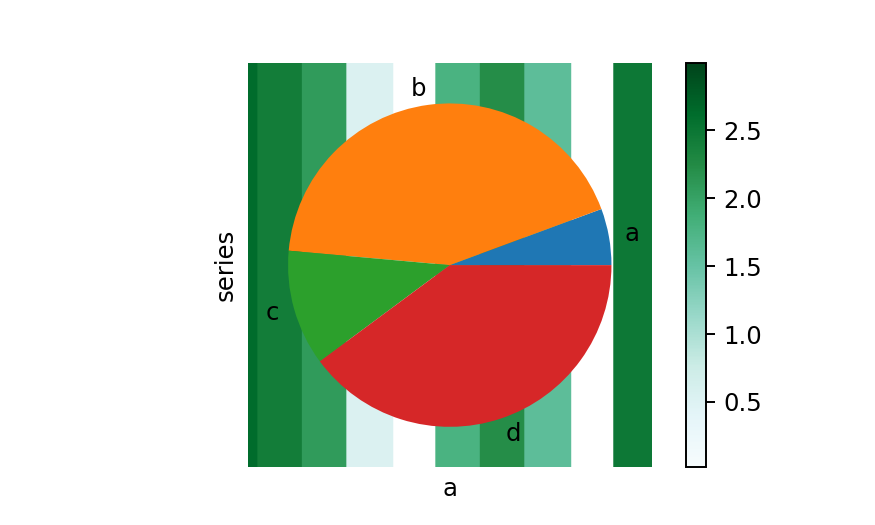

<AxesSubplot:xlabel='a', ylabel='b'>

In [47]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
# np.random.seed(seed=123456)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=25)

In [48]:
np.random.seed(seed=123456)
series = pd.Series(3 * np.random.rand(4),
            index=['a', 'b', 'c', 'd'], name='series')

a    0.380909
b    2.900154
c    0.781428
d    2.691710
Name: series, dtype: float64

In [49]:
series.plot.pie()

<AxesSubplot:xlabel='a', ylabel='series'>

In [51]:
np.random.seed(seed=123456)
df = pd.DataFrame(3 * np.random.rand(4, 2),
        index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

,x,y
a,0.380909,2.900154
b,0.781428,2.691710
c,1.130249,1.008665
d,1.354129,2.520765


<IPython.core.display.Javascript object>


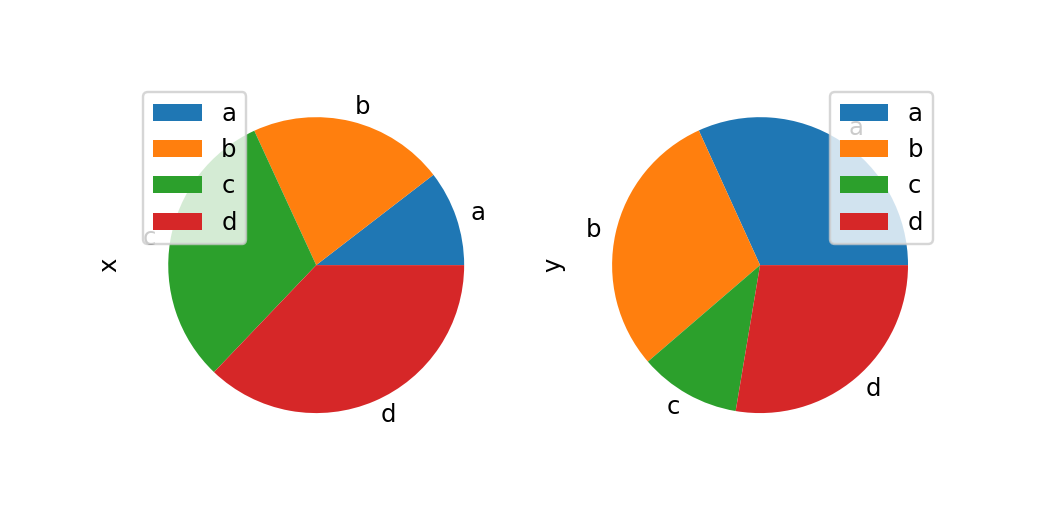

array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

In [53]:
df.plot.pie(subplots=True, figsize=(6, 3))

In [54]:
from pandas.plotting import scatter_matrix

<IPython.core.display.Javascript object>


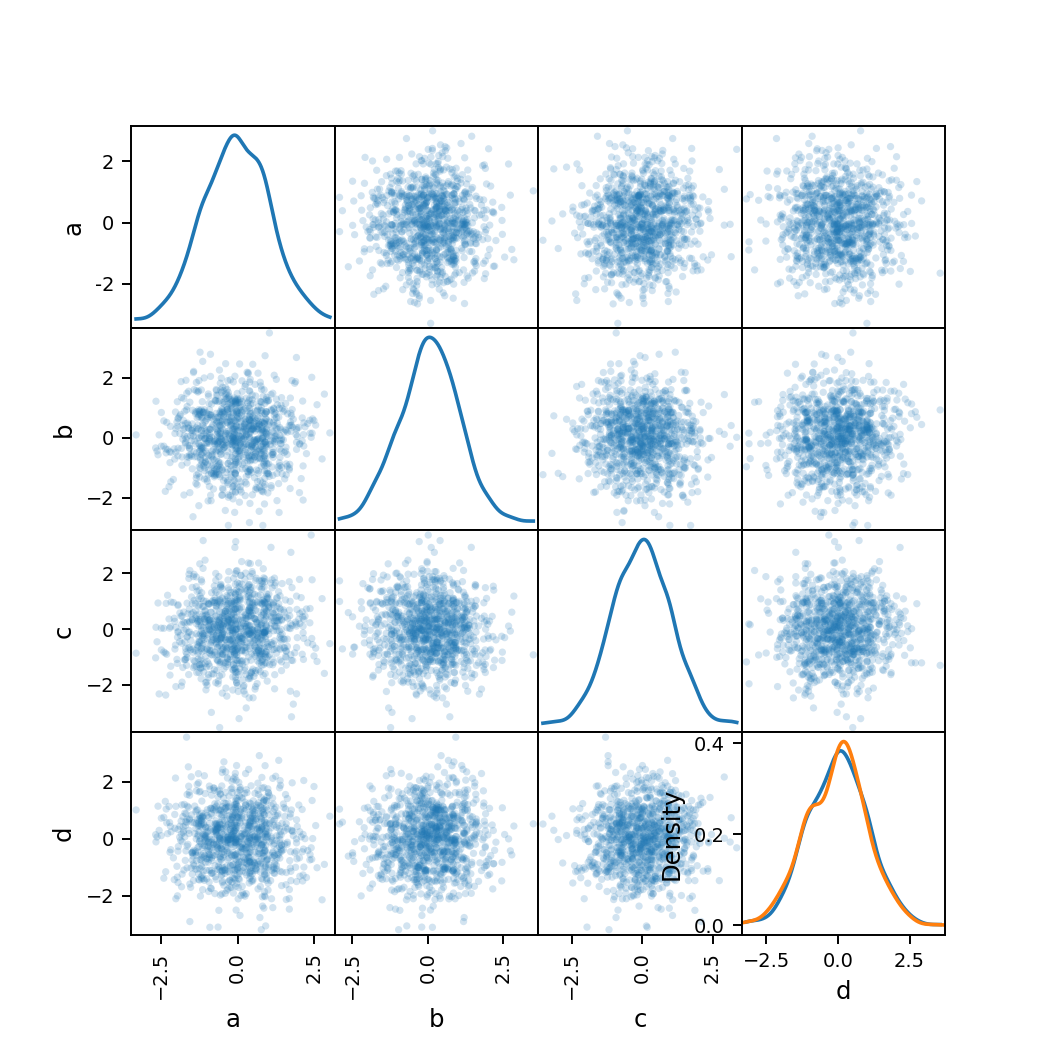

In [55]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde');

In [56]:
np.random.seed(seed=123456)
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

<AxesSubplot:xlabel='d', ylabel='Density'>

<IPython.core.display.Javascript object>


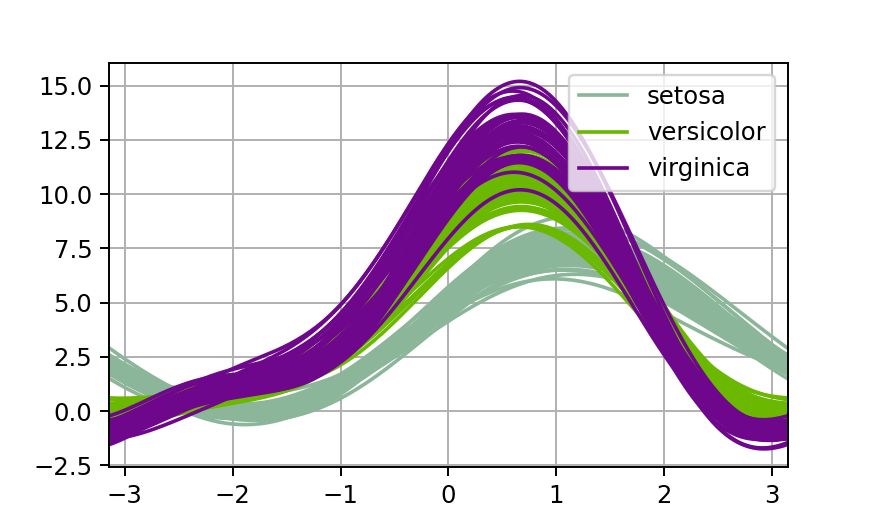

<AxesSubplot:>

In [61]:
np.random.seed(seed=123456)
from pandas.plotting import andrews_curves
data = pd.read_csv('iris.csv')
plt.figure()
andrews_curves(data, 'species')

In [58]:
pwd

'D:\\Google Drive\\My Documents\\code\\python\\Pycharm Projects\\Self Study\\Pandas Web Docs'

In [60]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<IPython.core.display.Javascript object>


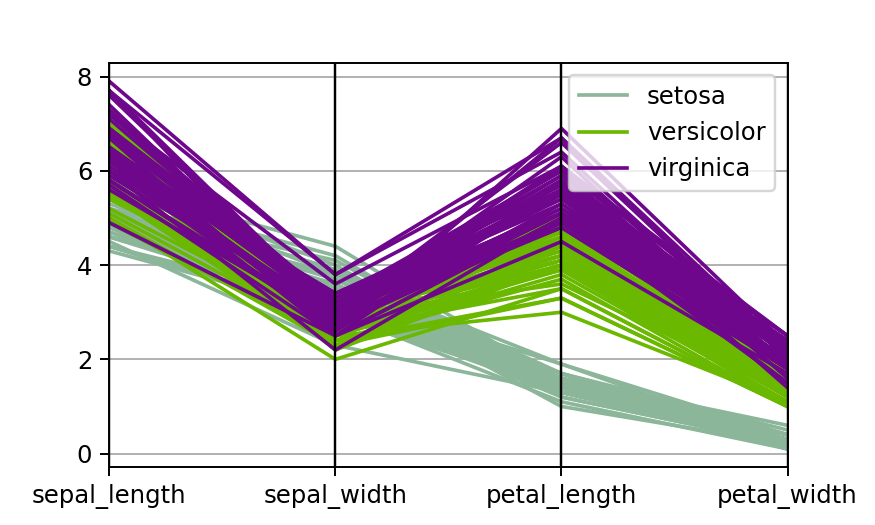

<AxesSubplot:>

In [63]:
from pandas.plotting import parallel_coordinates

np.random.seed(seed=123456)
plt.figure();
parallel_coordinates(data, 'species')

<IPython.core.display.Javascript object>


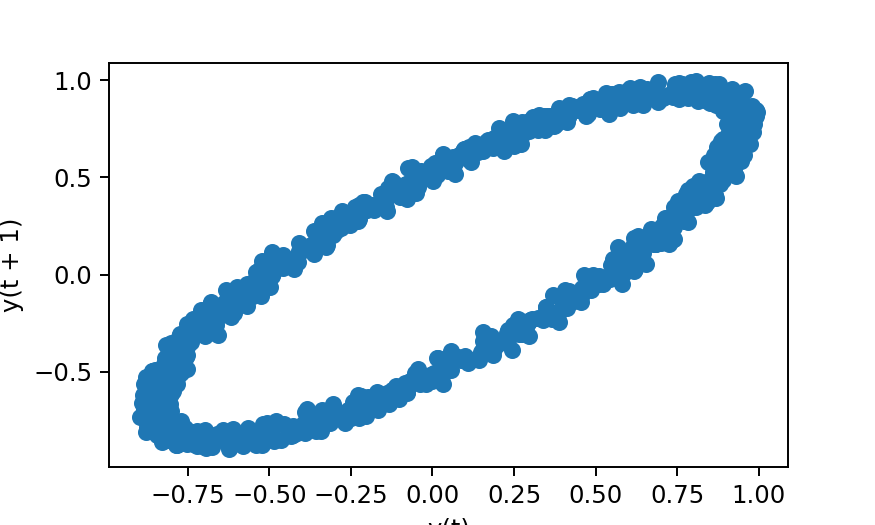

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

In [64]:
from pandas.plotting import lag_plot
plt.figure();
spacing = np.linspace(-99 * np.pi, 99 * np.pi, num=1000)
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(spacing))
lag_plot(data)

In [67]:
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']